# Analysis of differential abundances of proteins in exocrine tissue

The .d files obtained on timsTOF mass spectrimeter in the DDA mode were searched against a concensus proteome for Mus musculus with MDFragger search engine. Validation of the matches were done with Philosopher. The LFQ intensities were calculated using IonQuant tool with match between runs. All the analysis was run using a FragPipe pipeline. 
Citations:
1. Kong, A. T., Leprevost, F. V., Avtonomov, D. M., Mellacheruvu, D., & Nesvizhskii, A. I. (2017). MSFragger: ultrafast and comprehensive peptide identification in mass spectrometry–based proteomics. Nature Methods, 14(5), 513-520.
2. da Veiga Leprevost, F., Haynes, S. E., Avtonomov, D. M., Chang, H. Y., Shanmugam, A. K., Mellacheruvu, D., Kong, A. T., & Nesvizhskii, A. I. (2020). Philosopher: a versatile toolkit for shotgun proteomics data analysis. Nature Methods, 17(9), 869-870.
3. Yu, F., Haynes, S. E., Teo, G. C., Avtonomov, D. M., Polasky, D. A., & Nesvizhskii, A. I. (2020). Fast quantitative analysis of timsTOF PASEF data with MSFragger and IonQuant. Molecular & Cellular Proteomics.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Importing the data

data = pd.read_table(
    '/Users/ksenia/Documents/Karianne/Pancreatitis_project_FragPipe/exo_combined/combined_protein.tsv')
data

,Protein,Protein ID,Entry Name,Gene,Protein Length,Organism,Protein Existence,Description,Protein Probability,Top Peptide Probability,...,exo_hyb_1 Intensity,exo_hyb_2 Intensity,exo_hyb_3 Intensity,exo_control_1 MaxLFQ Intensity,exo_control_2 MaxLFQ Intensity,exo_control_3 MaxLFQ Intensity,exo_hyb_1 MaxLFQ Intensity,exo_hyb_2 MaxLFQ Intensity,exo_hyb_3 MaxLFQ Intensity,Indistinguishable Proteins
0,sp|A0A7N9VSG0|AFG2B_MOUSE,A0A7N9VSG0,AFG2B_MOUSE,Afg2b,747,Mus musculus,2:Experimental evidence at transcript level,ATPase family gene 2 protein homolog B,0.9997,0.9990,...,1.416260e+04,1.247722e+04,0.000000e+00,12438.423,0.000,0.000,1.416260e+04,1.247722e+04,0.000000e+00,NaN
1,sp|A1L317|K1C24_MOUSE,A1L317,K1C24_MOUSE,Krt24,512,Mus musculus,2:Experimental evidence at transcript level,"Keratin, type I cytoskeletal 24",0.9998,0.9952,...,2.683812e+03,0.000000e+00,0.000000e+00,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,sp|A1L3P4|SL9A6_MOUSE,A1L3P4,SL9A6_MOUSE,Slc9a6,702,Mus musculus,1:Experimental evidence at protein level,Sodium/hydrogen exchanger 6,0.9251,0.9989,...,6.839170e+04,8.767484e+04,0.000000e+00,0.000,45973.390,41277.060,6.839170e+04,8.767484e+04,0.000000e+00,tr|B0QZV3|B0QZV3_MOUSE
3,sp|A2A432-2|CUL4B_MOUSE,A2A432-2,CUL4B_MOUSE,Cul4b,941,Mus musculus,NaN,Isoform 2 of Cullin-4B,1.0000,0.9990,...,8.126808e+04,7.092159e+04,5.955839e+04,80244.266,79350.050,96612.350,8.126808e+04,7.092159e+04,5.955839e+04,"sp|A2A432|CUL4B_MOUSE, tr|E9PXY1|E9PXY1_MOUSE"
4,sp|A2A5R2|BIG2_MOUSE,A2A5R2,BIG2_MOUSE,Arfgef2,1792,Mus musculus,1:Experimental evidence at protein level,Brefeldin A-inhibited guanine nucleotide-excha...,1.0000,0.9990,...,6.328900e+05,5.202178e+05,4.914245e+05,89731.680,74588.970,89515.770,8.297834e+04,9.868605e+04,8.482139e+04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,tr|Q9Z1R9|Q9Z1R9_MOUSE,Q9Z1R9,Q9Z1R9_MOUSE,Prss1,246,Mus musculus,1:Experimental evidence at protein level,"Protease, serine 1 (trypsin 1)",1.0000,0.9990,...,5.227485e+02,4.539234e+04,3.077346e+02,2187.164,13019.878,0.000,2.525660e+03,5.076862e+03,1.486820e+03,NaN
4365,tr|S4R192|S4R192_MOUSE,S4R192,S4R192_MOUSE,Sec31a,248,Mus musculus,1:Experimental evidence at protein level,Sec31 homolog A (S. cerevisiae) (Fragment),1.0000,0.9990,...,0.000000e+00,4.663051e+04,0.000000e+00,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
4366,tr|S4R1S2|S4R1S2_MOUSE,S4R1S2,S4R1S2_MOUSE,Ank3,1807,Mus musculus,1:Experimental evidence at protein level,"Ankyrin 3, epithelial",1.0000,0.9990,...,6.674517e+05,4.113618e+05,3.660714e+05,86013.870,74959.695,65674.234,9.419654e+04,8.830118e+04,8.839031e+04,NaN
4367,tr|S4R2A9|S4R2A9_MOUSE,S4R2A9,S4R2A9_MOUSE,Sec31a,934,Mus musculus,1:Experimental evidence at protein level,Sec31 homolog A (S. cerevisiae) (Fragment),1.0000,0.9990,...,0.000000e+00,5.419825e+04,4.312875e+04,10906.854,49754.324,0.000,0.000000e+00,5.343562e+04,4.252188e+04,NaN


In [3]:
# Creating the gene-protein annotation table

names = data[['Gene', 'Description']]
names

,Gene,Description
0,Afg2b,ATPase family gene 2 protein homolog B
1,Krt24,"Keratin, type I cytoskeletal 24"
2,Slc9a6,Sodium/hydrogen exchanger 6
3,Cul4b,Isoform 2 of Cullin-4B
4,Arfgef2,Brefeldin A-inhibited guanine nucleotide-excha...
...,...,...
4364,Prss1,"Protease, serine 1 (trypsin 1)"
4365,Sec31a,Sec31 homolog A (S. cerevisiae) (Fragment)
4366,Ank3,"Ankyrin 3, epithelial"
4367,Sec31a,Sec31 homolog A (S. cerevisiae) (Fragment)


In [4]:
# Renaming the columns and choosing the columns with needed data

LFQ = data[['exo_control_1 MaxLFQ Intensity',
       'exo_control_2 MaxLFQ Intensity', 'exo_control_3 MaxLFQ Intensity',
       'exo_hyb_1 MaxLFQ Intensity', 'exo_hyb_2 MaxLFQ Intensity',
       'exo_hyb_3 MaxLFQ Intensity'
            ]].rename(columns={
    'exo_control_1 MaxLFQ Intensity': 'exo_K_I',
       'exo_control_2 MaxLFQ Intensity': 'exo_K_II',
    'exo_control_3 MaxLFQ Intensity': 'exo_K_III',
       'exo_hyb_1 MaxLFQ Intensity': 'exo_C_I',
    'exo_hyb_2 MaxLFQ Intensity': 'exo_C_II',
       'exo_hyb_3 MaxLFQ Intensity': 'exo_C_III'})
LFQ

,exo_K_I,exo_K_II,exo_K_III,exo_C_I,exo_C_II,exo_C_III
0,12438.423,0.000,0.000,1.416260e+04,1.247722e+04,0.000000e+00
1,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000,45973.390,41277.060,6.839170e+04,8.767484e+04,0.000000e+00
3,80244.266,79350.050,96612.350,8.126808e+04,7.092159e+04,5.955839e+04
4,89731.680,74588.970,89515.770,8.297834e+04,9.868605e+04,8.482139e+04
...,...,...,...,...,...,...
4364,2187.164,13019.878,0.000,2.525660e+03,5.076862e+03,1.486820e+03
4365,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00
4366,86013.870,74959.695,65674.234,9.419654e+04,8.830118e+04,8.839031e+04
4367,10906.854,49754.324,0.000,0.000000e+00,5.343562e+04,4.252188e+04


In [5]:
# Normalization on median

for colname, colvalues in LFQ.iteritems():
    med = colvalues.median()
    new_colname = colname + '_med_dist'
    LFQ[new_colname] = abs(colvalues - med)
    median_deviation = LFQ[new_colname].median()
    print(median_deviation)
    norm_colname = colname + '_normalized_values'
    LFQ[norm_colname] = LFQ[new_colname] / median_deviation

79795.484
73676.34
72888.77
66110.849
78401.445
74771.164


In [6]:
LFQ

,exo_K_I,exo_K_II,exo_K_III,exo_C_I,exo_C_II,exo_C_III,exo_K_I_med_dist,exo_K_I_normalized_values,exo_K_II_med_dist,exo_K_II_normalized_values,exo_K_III_med_dist,exo_K_III_normalized_values,exo_C_I_med_dist,exo_C_I_normalized_values,exo_C_II_med_dist,exo_C_II_normalized_values,exo_C_III_med_dist,exo_C_III_normalized_values
0,12438.423,0.000,0.000,1.416260e+04,1.247722e+04,0.000000e+00,67357.061,0.844121,73676.340,1.000000,72888.770,1.000000,6.627363e+04,1.002462,6.592422e+04,0.840855,7.477116e+04,1.000000
1,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,79795.484,1.000000,73676.340,1.000000,72888.770,1.000000,8.043623e+04,1.216687,7.840145e+04,1.000000,7.477116e+04,1.000000
2,0.000,45973.390,41277.060,6.839170e+04,8.767484e+04,0.000000e+00,79795.484,1.000000,27702.950,0.376009,31611.710,0.433698,1.204453e+04,0.182187,9.273391e+03,0.118281,7.477116e+04,1.000000
3,80244.266,79350.050,96612.350,8.126808e+04,7.092159e+04,5.955839e+04,448.782,0.005624,5673.710,0.077009,23723.580,0.325476,8.318500e+02,0.012583,7.479859e+03,0.095405,1.521278e+04,0.203458
4,89731.680,74588.970,89515.770,8.297834e+04,9.868605e+04,8.482139e+04,9936.196,0.124521,912.630,0.012387,16627.000,0.228115,2.542106e+03,0.038452,2.028461e+04,0.258728,1.005023e+04,0.134413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,2187.164,13019.878,0.000,2.525660e+03,5.076862e+03,1.486820e+03,77608.320,0.972590,60656.462,0.823283,72888.770,1.000000,7.791057e+04,1.178484,7.332458e+04,0.935245,7.328434e+04,0.980115
4365,0.000,0.000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,79795.484,1.000000,73676.340,1.000000,72888.770,1.000000,8.043623e+04,1.216687,7.840145e+04,1.000000,7.477116e+04,1.000000
4366,86013.870,74959.695,65674.234,9.419654e+04,8.830118e+04,8.839031e+04,6218.386,0.077929,1283.355,0.017419,7214.536,0.098980,1.376031e+04,0.208140,9.899735e+03,0.126270,1.361915e+04,0.182144
4367,10906.854,49754.324,0.000,0.000000e+00,5.343562e+04,4.252188e+04,68888.630,0.863315,23922.016,0.324691,72888.770,1.000000,8.043623e+04,1.216687,2.496583e+04,0.318436,3.224928e+04,0.431306


In [7]:
LFQ_norm = LFQ[['exo_K_I_normalized_values', 'exo_K_II_normalized_values', 
                'exo_K_III_normalized_values', 'exo_C_I_normalized_values', 
                'exo_C_II_normalized_values', 'exo_C_III_normalized_values']]
LFQ_norm

,exo_K_I_normalized_values,exo_K_II_normalized_values,exo_K_III_normalized_values,exo_C_I_normalized_values,exo_C_II_normalized_values,exo_C_III_normalized_values
0,0.844121,1.000000,1.000000,1.002462,0.840855,1.000000
1,1.000000,1.000000,1.000000,1.216687,1.000000,1.000000
2,1.000000,0.376009,0.433698,0.182187,0.118281,1.000000
3,0.005624,0.077009,0.325476,0.012583,0.095405,0.203458
4,0.124521,0.012387,0.228115,0.038452,0.258728,0.134413
...,...,...,...,...,...,...
4364,0.972590,0.823283,1.000000,1.178484,0.935245,0.980115
4365,1.000000,1.000000,1.000000,1.216687,1.000000,1.000000
4366,0.077929,0.017419,0.098980,0.208140,0.126270,0.182144
4367,0.863315,0.324691,1.000000,1.216687,0.318436,0.431306


In [8]:
#How many proteins have non-zero LFQ values in each sample:

for (columnName, columnData) in LFQ.iteritems():
    print(columnName)
    print(sum(~np.isnan(columnData.values)))

exo_K_I
4369
exo_K_II
4369
exo_K_III
4369
exo_C_I
4369
exo_C_II
4369
exo_C_III
4369
exo_K_I_med_dist
4369
exo_K_I_normalized_values
4369
exo_K_II_med_dist
4369
exo_K_II_normalized_values
4369
exo_K_III_med_dist
4369
exo_K_III_normalized_values
4369
exo_C_I_med_dist
4369
exo_C_I_normalized_values
4369
exo_C_II_med_dist
4369
exo_C_II_normalized_values
4369
exo_C_III_med_dist
4369
exo_C_III_normalized_values
4369


Here we see that all the samples have approximately similat number of proteins

In [9]:
# Taking log of the values

LFQ_log = np.log2(LFQ_norm)
LFQ_log

,exo_K_I_normalized_values,exo_K_II_normalized_values,exo_K_III_normalized_values,exo_C_I_normalized_values,exo_C_II_normalized_values,exo_C_III_normalized_values
0,-0.244478,0.000000,0.000000,0.003548,-0.250072,0.000000
1,0.000000,0.000000,0.000000,0.282958,0.000000,0.000000
2,0.000000,-1.411162,-1.205237,-2.456509,-3.079711,0.000000
3,-7.474148,-3.698837,-1.619375,-6.312420,-3.389797,-2.297198
4,-3.005542,-6.335028,-2.132169,-4.700791,-1.950495,-2.895254
...,...,...,...,...,...,...
4364,-0.040096,-0.280540,0.000000,0.236932,-0.096583,-0.028977
4365,0.000000,0.000000,0.000000,0.282958,0.000000,0.000000
4366,-3.681695,-5.843209,-3.336718,-2.264374,-2.985418,-2.456846
4367,-0.212041,-1.622862,0.000000,0.282958,-1.650925,-1.213215


In [10]:
# Replacing the 0 values with nan

LFQ_log.replace(0, np.nan, inplace=True)
LFQ_log

,exo_K_I_normalized_values,exo_K_II_normalized_values,exo_K_III_normalized_values,exo_C_I_normalized_values,exo_C_II_normalized_values,exo_C_III_normalized_values
0,-0.244478,NaN,NaN,0.003548,-0.250072,NaN
1,NaN,NaN,NaN,0.282958,NaN,NaN
2,NaN,-1.411162,-1.205237,-2.456509,-3.079711,NaN
3,-7.474148,-3.698837,-1.619375,-6.312420,-3.389797,-2.297198
4,-3.005542,-6.335028,-2.132169,-4.700791,-1.950495,-2.895254
...,...,...,...,...,...,...
4364,-0.040096,-0.280540,NaN,0.236932,-0.096583,-0.028977
4365,NaN,NaN,NaN,0.282958,NaN,NaN
4366,-3.681695,-5.843209,-3.336718,-2.264374,-2.985418,-2.456846
4367,-0.212041,-1.622862,NaN,0.282958,-1.650925,-1.213215


In [11]:
# Running the linear regression model

coef = []
Pv = []
std_err = []

for index, row in LFQ_log.iterrows():
    PG_data_one_prot = row
    #PG_data_one_prot
    one_prot_df = pd.DataFrame(PG_data_one_prot)
    one_prot_df.columns = ['value']
    one_prot_df = one_prot_df.reset_index()
    one_prot_df['kont_case'] = [mut.split('_')[1] for mut in one_prot_df['index']]
    one_prot_df['kont_case'] = one_prot_df['kont_case'].replace({'K': 0, 'C': 1})

    #define response variable
    y = one_prot_df['value']
    
    #define predictor variables
    x = one_prot_df[['kont_case']]

    #add constant to predictor variables
    x = sm.add_constant(x)

    #fit linear regression model
    model = sm.OLS(y, x).fit()

    coef.append(model.params.loc['kont_case'])
    Pv.append(model.pvalues.loc['kont_case'])
    std_err.append(model.bse.loc['kont_case'])

In [22]:
# Writing the results in a new data frame

results = pd.DataFrame()
results['fold_change'] = coef
results['P-value'] = Pv
results['std_error'] = std_err
results['-log10(P-value)'] = np.log10(results['P-value']) * (-1)
results['protein'] = names['Gene']
results = results.set_index('protein')
results

,fold_change,P-value,std_error,-log10(P-value)
protein,,,,
Afg2b,NaN,NaN,NaN,NaN
Krt24,NaN,NaN,NaN,NaN
Slc9a6,NaN,NaN,NaN,NaN
Cul4b,0.264315,0.905517,2.091159,0.043103
Arfgef2,0.642066,0.693211,1.513439,0.159135
...,...,...,...,...
Prss1,NaN,NaN,NaN,NaN
Sec31a,NaN,NaN,NaN,NaN
Ank3,1.718328,0.102208,0.813429,0.990516


<AxesSubplot:ylabel='Frequency'>

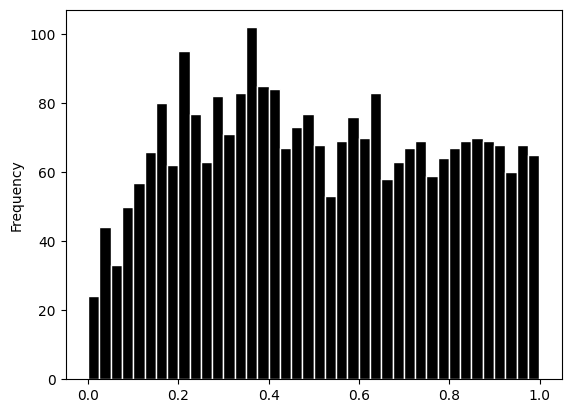

In [13]:
# Checking the P-value distribution

results['P-value'].plot.hist(bins=40, edgecolor="w", color="k")

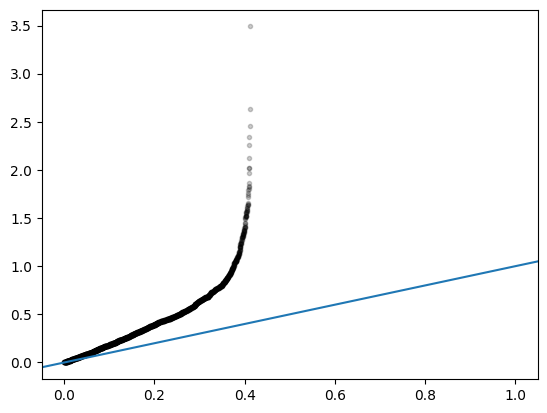

In [21]:
# Creating a QQ-plot showing how our P-values decline from the uniform distribution

expected = np.sort(-np.log10(np.random.uniform(0.0,1.0,len(results))))
plt.scatter(expected, np.sort(results['-log10(P-value)']), marker='.', alpha=0.2, color="k")
plt.axline([0, 0], [1, 1])
#plt.show()
plt.savefig(
    '/Users/ksenia/Documents/Karianne/Pancreatitis_project_FragPipe/exo_combined/QQ_plot_exocrine.png',
    dpi=300)

QQ-plot goes vertical at app. 1, therefore, this is going to be the -log(p-value) threshold. The fold change (slope coeficcient) threshold should be chosen according to common sence and the desires of the scientist. The value 2 here would mean the change by 2 times. This can be changed at the stage of the table filtering.

In [23]:
# Creating the Volcano plot of linear model slope coeficient (x-axis) vs. -log10(P-values) (y-axix)

fig = px.scatter(results, x="fold_change", y="-log10(P-value)",
                title="Volcano plot for proteins")
fig.show()
fig.write_image(
    '/Users/ksenia/Documents/Karianne/Pancreatitis_project_FragPipe/exo_combined/volcano_exocrine.png',
    scale=2)

In [16]:
# Total number of proteins in the results is

len(results.dropna(how='all'))

2715

In [24]:
# Significantly different proteins:

diff_genes = results.loc[(abs(results['fold_change']) > 1) & # here we can change the fold change threshold
                        (results['-log10(P-value)'] > 1.5)].sort_index()
diff_genes

,fold_change,P-value,std_error,-log10(P-value)
protein,,,,
Abhd11,-1.035247,0.015065,0.253569,1.822035
Alg11,-1.301752,0.025772,0.376017,1.588853
Asrgl1,1.894541,0.027631,0.559517,1.558601
Atp6ap1,1.044028,0.026276,0.303430,1.580446
Bcl2l13,-2.576076,0.003460,0.416080,2.460969
Ehd1,-1.077108,0.010875,0.239694,1.963568
Gyg1,-1.435141,0.027679,0.424076,1.557851
H1-1,-1.238843,0.016054,0.309269,1.794425
HBB,1.618332,0.023804,0.455903,1.623343


In [25]:
# Adding the direction of regulation as a column and the protein name, making it more comprehensive

diff_prot = diff_genes.join(names.set_index('Gene'))
upps_downs = []
for index, row in diff_prot.iterrows():
    if row['fold_change'] > 0:
        upps_downs.append('up')
    if row['fold_change'] < 0:
        upps_downs.append('down')
diff_prot['direction'] = upps_downs
comprehensive = diff_prot.reset_index().rename(columns={'index': 'Gene'})[['Gene', 'Description', 'direction']]
comprehensive

,Gene,Description,direction
0,Abhd11,Protein ABHD11,down
1,Alg11,"GDP-Man:Man(3)GlcNAc(2)-PP-Dol alpha-1,2-manno...",down
2,Asrgl1,Isoaspartyl peptidase/L-asparaginase,up
3,Atp6ap1,V-type proton ATPase subunit S1,up
4,Bcl2l13,Bcl-2-like protein 13,down
5,Ehd1,EH domain-containing protein 1,down
6,Gyg1,Glycogenin-1,down
7,H1-1,Histone H1.1,down
8,HBB,Hemoglobin subunit beta,up
9,Inmt,Indolethylamine N-methyltransferase,up


In [19]:
# Saving to file

comprehensive.to_csv(
    '/Users/ksenia/Documents/Karianne/Pancreatitis_project_FragPipe/exo_combined/diff_prots_exocrine.csv'
    , index=False)

In [20]:
# Displaying the gene symbols for easier copying

for g in comprehensive['Gene']:
    print(g.lower())

abhd11
alg11
asrgl1
atp6ap1
bcl2l13
ehd1
gyg1
h1-1
hbb
inmt
krt7
lamp1
mix23
nqo2
psmg1
ptgr2
rps6kb1
slc38a5
top2b
